In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import operator
import time
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

import os

In [2]:
items=pd.read_csv('item_properties_part1.csv')
items1=pd.read_csv('item_properties_part2.csv')
items=pd.concat([items1,items])

items.head()

,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525
3,1431831600000,403324,917,1204143
4,1435460400000,230701,521,769062


In [3]:
items.shape

(20275902, 4)

In [4]:
import datetime
times=[]
for i in items['timestamp']:
    times.append(datetime.datetime.fromtimestamp(i//1000.0))

In [5]:
items['timestamp']=times

In [6]:
#items.to_csv('items.csv')
items.head()

,timestamp,itemid,property,value
0,2015-05-30 20:00:00,183478,561,769062
1,2015-08-15 20:00:00,132256,976,n26.400 1135780
2,2015-06-27 20:00:00,420307,921,1149317 1257525
3,2015-05-16 20:00:00,403324,917,1204143
4,2015-06-27 20:00:00,230701,521,769062


In [8]:
events=pd.read_csv('events.csv')

In [9]:
events.head
events.shape

(2756101, 5)

The number of visitors is half the count of visitors who did some actions.

In [10]:
visitors=events["visitorid"].unique()
print('Visitor count on actions:',events["visitorid"].shape)
print('Total unique visitors :',visitors.shape)
#unique visitors are almost half the number of total visitors

Visitor count on actions: (2756101,)
Total unique visitors : (1407580,)


In [11]:
events["event"].unique()

array(['view', 'addtocart', 'transaction'], dtype=object)

Only 5 thousands of transactions repeated, rest 22457 were different so, Market basket analysis wouldnt be so perfect


In [12]:
print(events["transactionid"].dropna().unique().shape[0])
print(events["transactionid"].dropna().shape[0])

17672
22457


We can see that: 78.6% data are single transactional sets.So MBA wont work well

Number of items (count unique itemid)

In [13]:
print(events["itemid"].unique().shape)
#events["itemid"].unique()

(235061,)


Count of Actions and its plot

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


addtocart      69332
transaction    22457
Name: event, dtype: int64


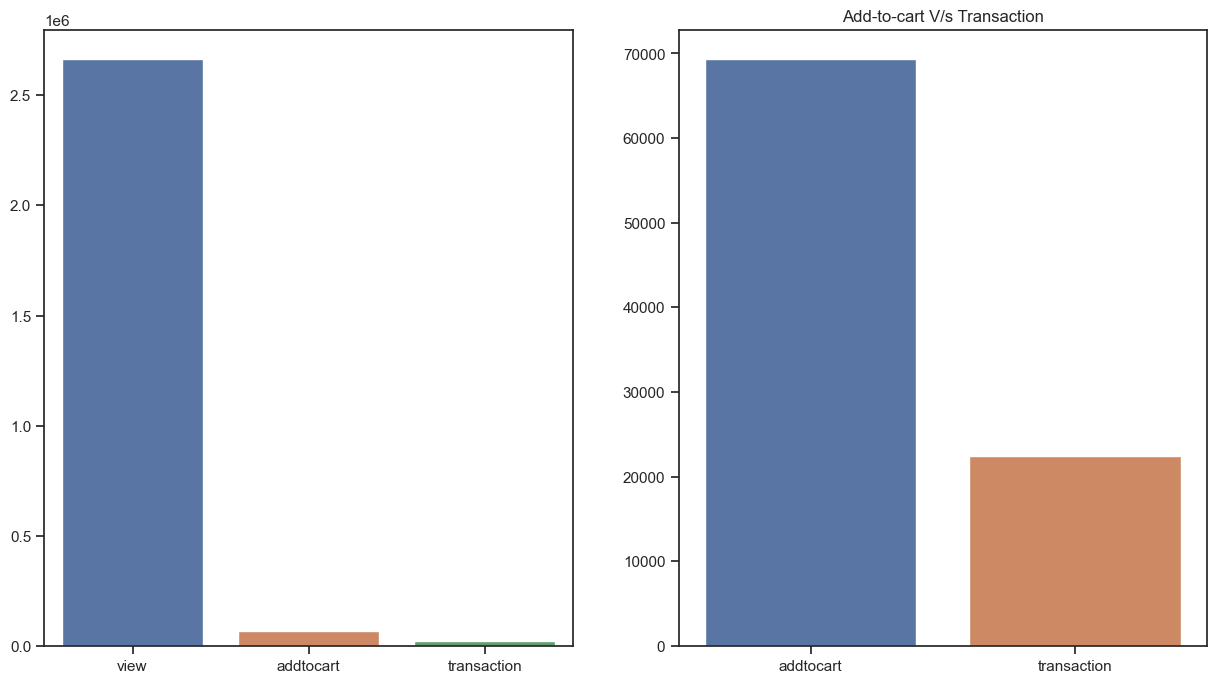

In [14]:
events_count=events["event"].value_counts()
fig, axs = plt.subplots(ncols=2,figsize=(15, 8))
sns.barplot(events_count.index, events_count.values, ax=axs[0])

events_count=events["event"].value_counts()[1:]
#plt.title('Actions Vs Count')
g=sns.barplot(events_count.index, events_count.values,ax=axs[1])
#g.set_yscale('log')
events_count=events["event"].value_counts()[1:]
plt.title('Add-to-cart V/s Transaction')
sns.barplot(events_count.index, events_count.values)

print(events_count)

As View count is too much, o get a clear idea over add-to-cart and transaction actions I created a seperate plot

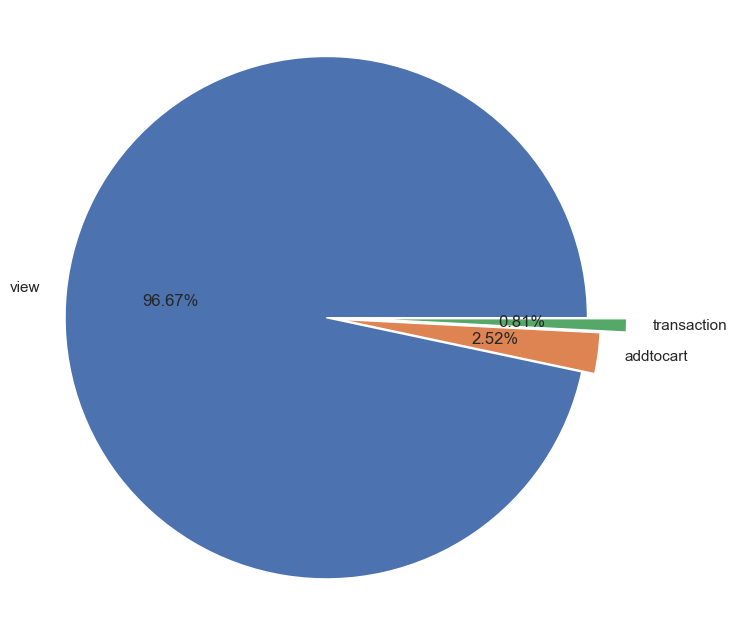

In [15]:
data = events.event.value_counts()
labels = data.index
sizes = data.values
explode = (0, 0.05, 0.15)
fig, ax = plt.subplots(figsize=(8,8))

patches, texts, autotexts = ax.pie(sizes, labels=labels, explode=explode, autopct='%1.2f%%', shadow=False, startangle=0) 

ax.axis('equal')
plt.show()

In [46]:
#sns.factorplot("sex", "survival_rate", col="class", data=df, kind="bar")

In [17]:
grouped=events.groupby('event')['itemid'].apply(list)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

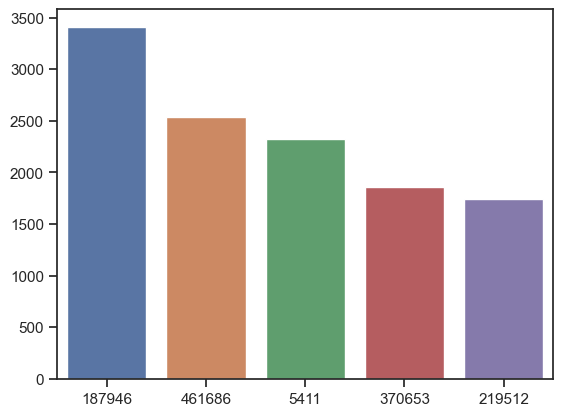

In [18]:
views=grouped['view']
count_view={}
#for item in set(views[:]):
    #print(item)
#    count_view[item]=views.count(item)
views=np.array(views[:])

unique, counts = np.unique(views, return_counts=True)
count_view=dict(zip(unique, counts))
sorted_count_view =sorted(count_view.items(), key=operator.itemgetter(1),reverse=True)
x=[i[0] for i in sorted_count_view[:5]]
y=[i[1] for i in sorted_count_view[:5]]
sns.barplot(x,y,order=x)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


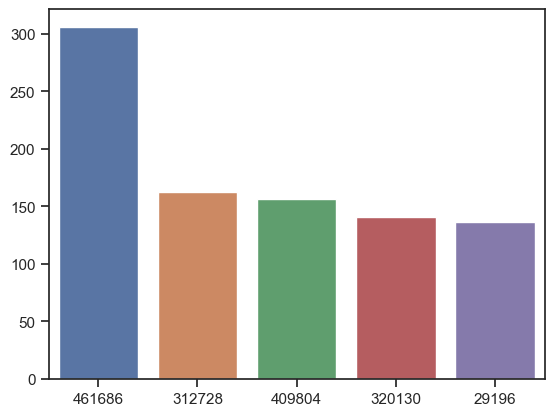

In [19]:
#the most addtocart itemid
addtocart=grouped['addtocart']
count_addtocart={}
# for item in set(addtocart[:]):
#     #print(item)
#     count_addtocart[item]=addtocart.count(item)
addtocart=np.array(addtocart[:])
unique, counts = np.unique(addtocart, return_counts=True)
count_addtocart=dict(zip(unique, counts))

sorted_count_addtocart =sorted(count_addtocart.items(), key=operator.itemgetter(1),reverse=True)
x=[i[0] for i in sorted_count_addtocart[:5]]
y=[i[1] for i in sorted_count_addtocart[:5]]
g=sns.barplot(x,y, order=x)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


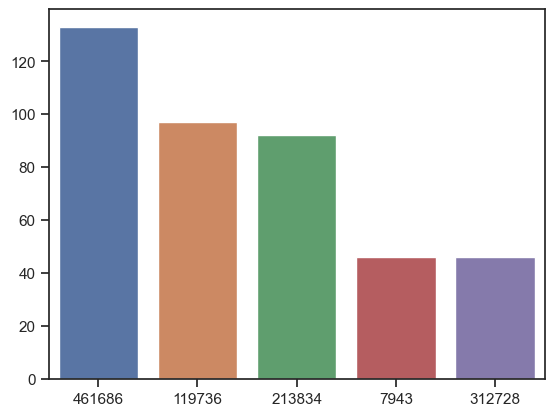

In [20]:
#the most transaction itemid
transaction=grouped['transaction']
count_transaction={}
# for item in set(transaction[]):
#     #print(item)
#     count_transaction[item]=transaction.count(item)
transaction=np.array(transaction[:])
unique, counts = np.unique(transaction, return_counts=True)
count_transaction=dict(zip(unique, counts))

sorted_count_transaction =sorted(count_transaction.items(), key=operator.itemgetter(1),reverse=True)
x=[i[0] for i in sorted_count_transaction[:5]]
y=[i[1] for i in sorted_count_transaction[:5]]
g=sns.barplot(x,y, order=x)

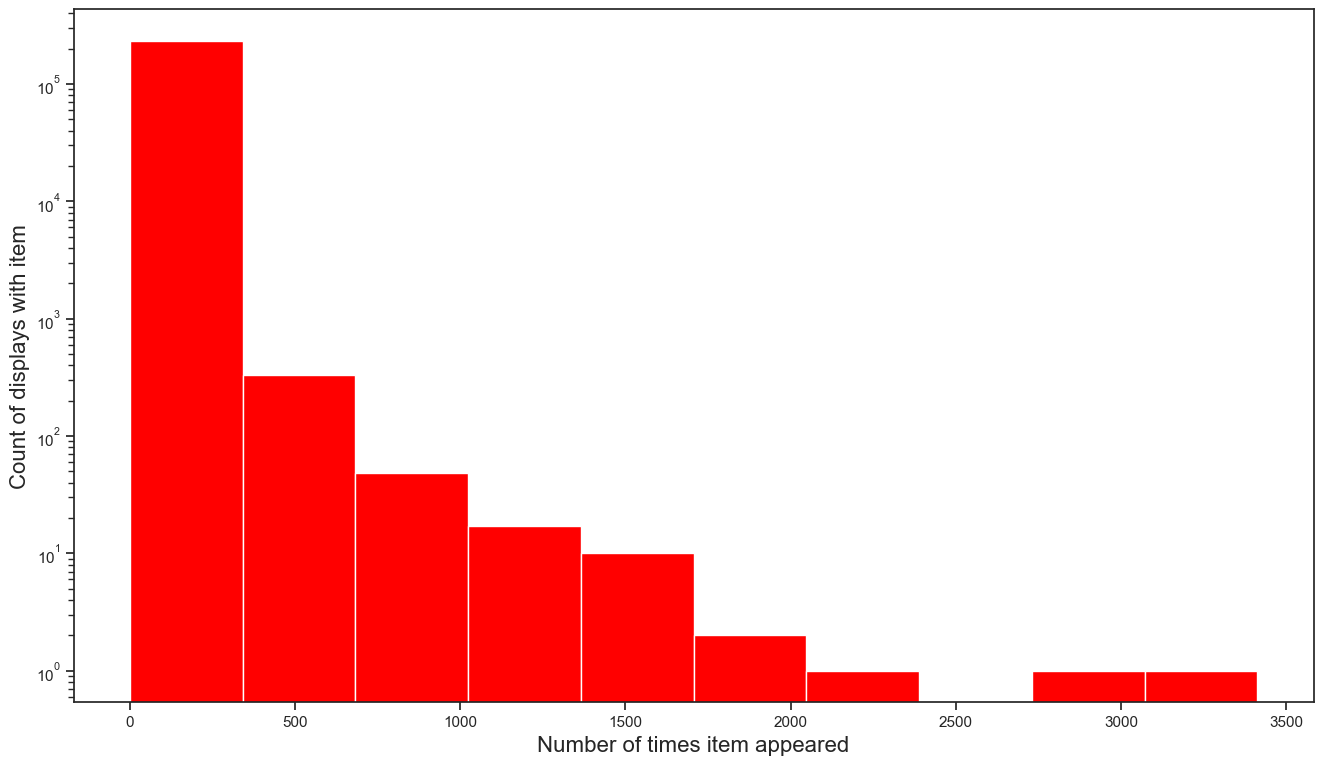

In [21]:
items = events.itemid.value_counts()
plt.figure(figsize=(16, 9))
plt.hist(items.values, bins=10, log=True,color='red')
plt.xlabel('Number of times item appeared', fontsize=16)
plt.ylabel('Count of displays with item', fontsize=16)
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

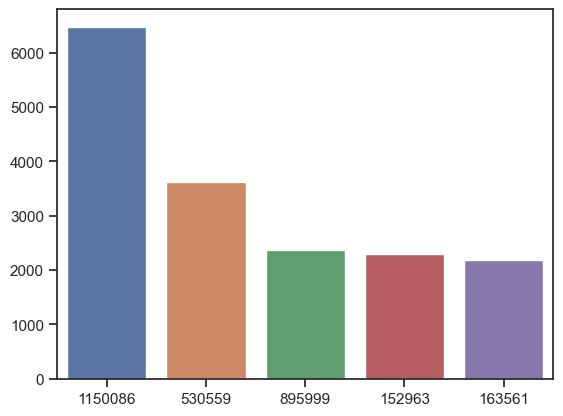

In [22]:
#number of total views, number of avg view by top users(quantile 90% and also all users)
grouped=events.groupby('event')['visitorid'].apply(list)
views=grouped['view']
count_view={}
# for item in set(views[:]):
#     #print(item)
#     count_view[item]=views.count(item)

views=np.array(views[:])

unique, counts = np.unique(views, return_counts=True)
count_view=dict(zip(unique, counts))

sorted_count_view =sorted(count_view.items(), key=operator.itemgetter(1),reverse=True)
x=[i[0] for i in sorted_count_view[:5]]
y=[i[1] for i in sorted_count_view[:5]]
sns.barplot(x,y,order=x)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


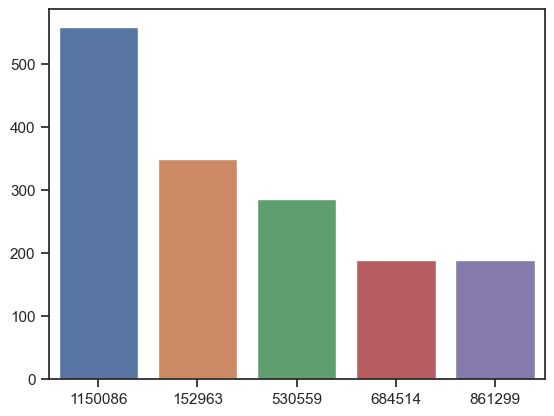

In [23]:
#number of total transactions, number of avg transactions by top users(quantile 90% and also all users)
transaction=grouped['transaction']
count_transaction={}
# for item in set(transaction:
#     #print(item)
#     count_transaction[item]=transaction.count(item)
transaction=np.array(transaction[:])
unique, counts = np.unique(transaction, return_counts=True)
count_transaction=dict(zip(unique, counts))
sorted_count_transaction =sorted(count_transaction.items(), key=operator.itemgetter(1),reverse=True)
x=[i[0] for i in sorted_count_transaction[:5]]
y=[i[1] for i in sorted_count_transaction[:5]]
g=sns.barplot(x,y, order=x)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


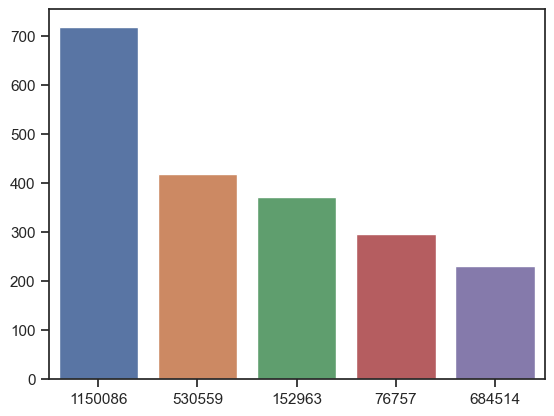

In [24]:
#number of total addtocart, number of avg addtocart by top users(quantile 90% and also all users)
addtocart=grouped['addtocart']
count_addtocart={}
# for item in set(addtocart[:]):
#     #print(item)
#     count_addtocart[item]=addtocart.count(item)
addtocart=np.array(addtocart[:])
unique, counts = np.unique(addtocart, return_counts=True)
count_addtocart=dict(zip(unique, counts))
sorted_count_addtocart =sorted(count_addtocart.items(), key=operator.itemgetter(1),reverse=True)
x=[i[0] for i in sorted_count_addtocart[:5]]
y=[i[1] for i in sorted_count_addtocart[:5]]
g=sns.barplot(x,y, order=x)

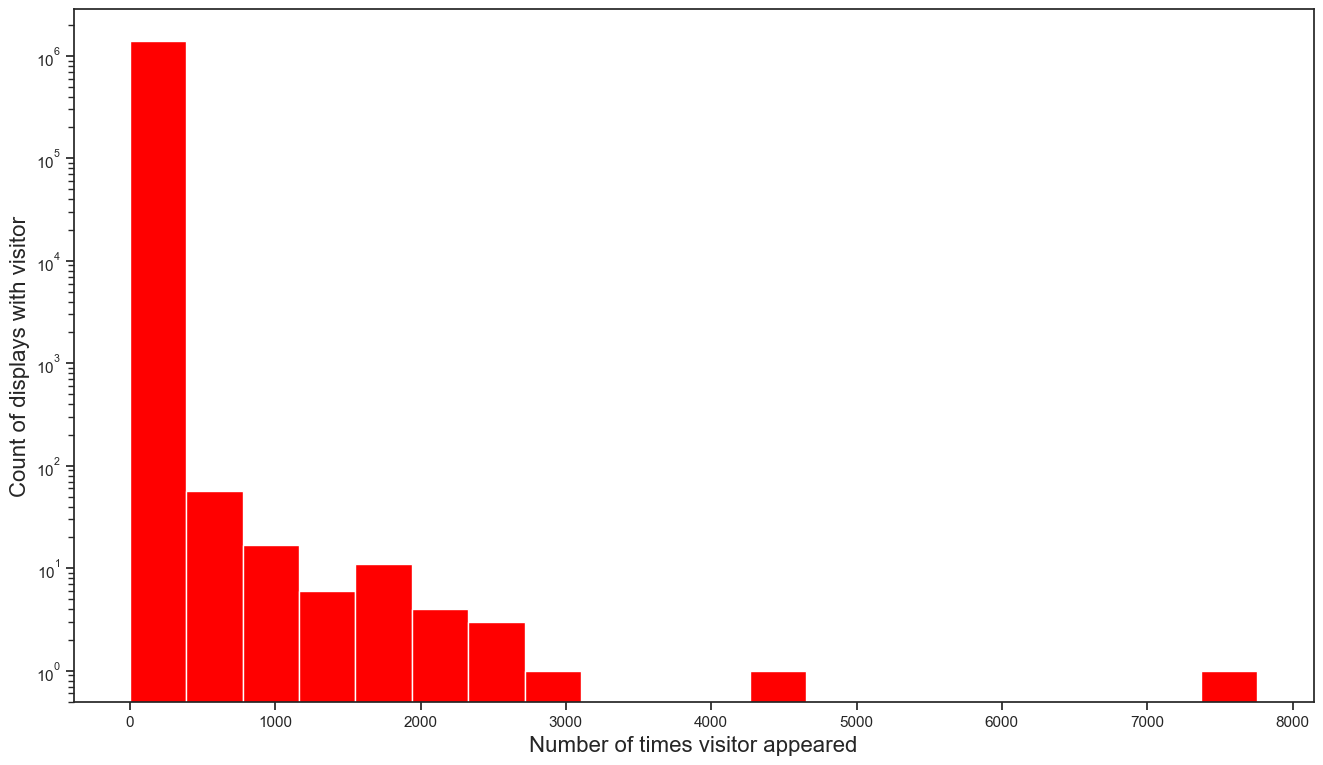

In [25]:
items = events.visitorid.value_counts()
plt.figure(figsize=(16, 9))
plt.hist(items.values, bins=20, log=True,color='red')
plt.xlabel('Number of times visitor appeared', fontsize=16)
plt.ylabel('Count of displays with visitor', fontsize=16)
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


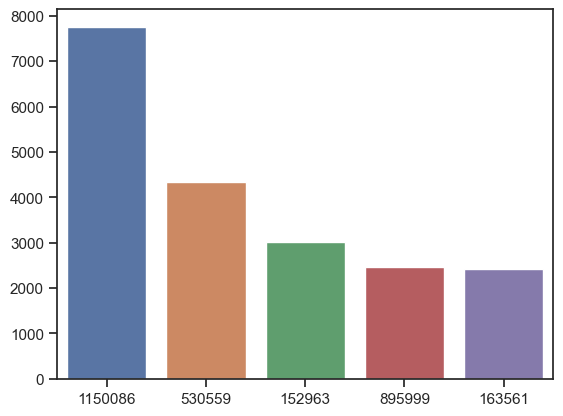

In [26]:
#most active user(s)   3 plot of each with view,add,transaction events
allevents=list(events['visitorid'])
count_allevents={}
# for item in set(allevents[:]):
#    # print(item)
#     count_allevents[item]=allevents.count(item)
allevents=np.array(allevents)
unique, counts = np.unique(allevents, return_counts=True)
count_allevents=dict(zip(unique, counts))
sorted_count_allevents =sorted(count_allevents.items(), key=operator.itemgetter(1),reverse=True)
x=[i[0] for i in sorted_count_allevents[:5]]
y=[i[1] for i in sorted_count_allevents[:5]]
g=sns.barplot(x,y, order=x)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


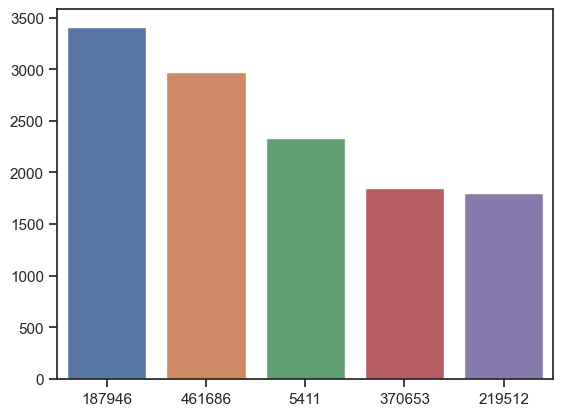

In [27]:
#most active item(s)   3 plot of each with view,add,transaction events
allevents=list(events['itemid'])
count_allevents={}
# for item in set(allevents[:]):
#    # print(item)
#     count_allevents[item]=allevents.count(item)
allevents=np.array(allevents)
unique, counts = np.unique(allevents, return_counts=True)
count_allevents=dict(zip(unique, counts))
sorted_count_allevents =sorted(count_allevents.items(), key=operator.itemgetter(1),reverse=True)
x=[i[0] for i in sorted_count_allevents[:5]]
y=[i[1] for i in sorted_count_allevents[:5]]
g=sns.barplot(x,y, order=x)

In [28]:
#Create
##########df= as below

#visitorid event count
#1   view 100
#1   addtocart   50
#1   transa    5
#2   view 100
#2   addtocart   50
#2   transa    5
#3   view 100
#3   addtocart   50
#3   transa    5
print(events.head())
items.head()
#ax = sns.catplot(x=x, y='visitorid',hue="event", data=events.iloc[:,:])

##
#x=[[1,2,3],[1,2,3],[12,1,2]]
#y=[1,2,3]
#sns.barplot(x,x)
##
#top 5-10 in each category plots and all category plots(stacked charts in all categories)

       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN


1150086    7757
530559     4328
152963     3024
895999     2474
163561     2410
Name: visitorid, dtype: int64

Event-wise Detailing

In [29]:
events.itemid.value_counts().describe()

count    235061.000000
mean         11.725046
std          37.032101
min           1.000000
25%           1.000000
50%           3.000000
75%           9.000000
max        3412.000000
Name: itemid, dtype: float64

In [30]:
events[events.event == 'view'].itemid.value_counts().describe()

count    234838.000000
mean         11.345319
std          35.409345
min           1.000000
25%           1.000000
50%           3.000000
75%           9.000000
max        3410.000000
Name: itemid, dtype: float64

In [31]:
events[events.event == 'addtocart'].itemid.value_counts().describe()

count    23903.000000
mean         2.900556
std          5.026141
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        306.000000
Name: itemid, dtype: float64

In [32]:
events[events.event == 'transaction'].itemid.value_counts().describe()

count    12025.000000
mean         1.867526
std          2.710560
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        133.000000
Name: itemid, dtype: float64

<AxesSubplot:>

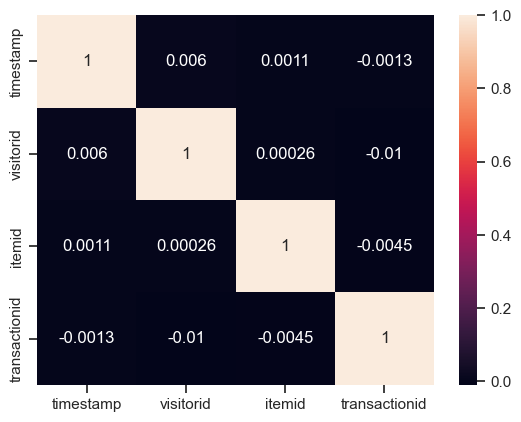

In [33]:
corr = events[events.columns].corr()
sns.heatmap(corr,annot = True)

In [34]:
#time vs event

In [40]:
import scipy.sparse as sp
from scipy.sparse import vstack
from scipy import sparse
from scipy.sparse.linalg import spsolve
from subprocess import check_output
from sklearn.model_selection import train_test_split
events = pd.read_csv('events.csv')
category_tree = pd.read_csv('category_tree.csv')
items1 = pd.read_csv('item_properties_part1.csv')
items2 = pd.read_csv('item_properties_part2.csv')
items = pd.concat([items1, items2])

In [41]:
n_users = events['visitorid'].unique().shape[0]
n_items = items['itemid'].max()
print (str(n_users) +" " +  str(n_items))
user_to_item_matrix = sp.dok_matrix((n_users+1, n_items+2), dtype=np.int8)

1407580 466866


In [42]:
action_weights = [1,2,3]
for row in events.itertuples():
#    if row[2] not in user_with_buy:
#        continue
#    mapped_user_key = user_with_buy[row[2]]
    mapped_user_key = row[2]
    if row.event == 'view':
            user_to_item_matrix[mapped_user_key, row[4]] = action_weights[0]
    elif row.event == 'addtocart':
            user_to_item_matrix[mapped_user_key, row[4]] = action_weights[1]        
    elif row.event == 'transaction':
            user_to_item_matrix[mapped_user_key, row[4]] = action_weights[2]
user_to_item_matrix = user_to_item_matrix.tocsr()
print (user_to_item_matrix.shape)

(1407581, 466868)


In [43]:
sparsity = float(len(user_to_item_matrix.nonzero()[0]))
sparsity /= (user_to_item_matrix.shape[0] * user_to_item_matrix.shape[1])
sparsity *= 100
print (sparsity)
X_train, X_test = train_test_split(user_to_item_matrix, test_size=0.20)
X_train.shape
X_test.shape

0.00032643448597272263


(281517, 466868)

In [44]:
from sklearn.metrics.pairwise import cosine_similarity
# TODO: this is user to user similarity. check item to item similarity as well
cosine_similarity_matrix = cosine_similarity(X_train, X_train, dense_output=False)
cosine_similarity_matrix.setdiag(0)
cosine_similarity_matrix_ll=cosine_similarity_matrix.tolil()
cosine_similarity_matrix.head()

C:\Users\admin\anaconda3\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


AttributeError: head not found

In [47]:
from datetime import datetime, timedelta
from sklearn import preprocessing
from lightfm import LightFM
from scipy.sparse import csr_matrix 
from scipy.sparse import coo_matrix 
from sklearn.metrics import roc_auc_score
import time
from lightfm.evaluation import auc_score
import pickle

def create_data(datapath,start_date,end_date):
    df=pd.read_csv(datapath)
    df=df.assign(date=pd.Series(datetime.fromtimestamp(a/1000).date() for a in df.timestamp))
    df=df.sort_values(by='date').reset_index(drop=True) # for some reasons RetailRocket did NOT sort data by date
    df=df[(df.date>=datetime.strptime(start_date,'%Y-%m-%d').date())&(df.date<=datetime.strptime(end_date,'%Y-%m-%d').date())]
    df=df[['visitorid','itemid','event']]
    return df

def create_implicit_feedback_matrix(df, split_ratio):
    # assume df.columns=['visitorid','itemid','event']
    id_cols=['visitorid','itemid']
    trans_cat=dict()
    for k in id_cols:
        cate_enc=preprocessing.LabelEncoder()
        trans_cat[k]=cate_enc.fit_transform(df[k].values)
    cate_enc=preprocessing.LabelEncoder()
    ratings=cate_enc.fit_transform(df.event) 
    n_users=len(np.unique(trans_cat['visitorid']))
    n_items=len(np.unique(trans_cat['itemid']))    
    split_point=np.int(np.round(df.shape[0]*split_ratio))
    
    rate_matrix=dict()
    rate_matrix['train']=coo_matrix((ratings[0:split_point],(trans_cat['visitorid'][0:split_point],\
                                              trans_cat['itemid'][0:split_point]))\
                             ,shape=(n_users,n_items))
    rate_matrix['test']=coo_matrix((ratings[split_point+1::],(trans_cat['visitorid'][split_point+1::],\
                                              trans_cat['itemid'][split_point+1::]))\
                             ,shape=(n_users,n_items))
    return rate_matrix

def create_implicit_feedback_matrix1(df, split_ratio):
    # assume df.columns=['visitorid','itemid','event']
    split_point=np.int(np.round(df.shape[0]*split_ratio))
    df_train=df.iloc[0:split_point]
    df_test=df.iloc[split_point::]
    df_test=df_test[(df_test['visitorid'].isin(df_train['visitorid']))&\
                     (df_test['itemid'].isin(df_train['itemid']))]
    id_cols=['visitorid','itemid']
    trans_cat_train=dict()
    trans_cat_test=dict()
    for k in id_cols:
        cate_enc=preprocessing.LabelEncoder()
        trans_cat_train[k]=cate_enc.fit_transform(df_train[k].values)
        trans_cat_test[k]=cate_enc.transform(df_test[k].values)
    
    # --- Encode ratings:
    cate_enc=preprocessing.LabelEncoder()
    ratings=dict()
    ratings['train']=cate_enc.fit_transform(df_train.event)
    ratings['test'] =cate_enc.transform(df_test.event)
    
    n_users=len(np.unique(trans_cat_train['visitorid']))
    n_items=len(np.unique(trans_cat_train['itemid']))    
    
    rate_matrix=dict()
    rate_matrix['train']=coo_matrix((ratings['train'],(trans_cat_train['visitorid'],\
                                              trans_cat_train['itemid']))\
                             ,shape=(n_users,n_items))
    rate_matrix['test']=coo_matrix((ratings['test'],(trans_cat_test['visitorid'],\
                                              trans_cat_test['itemid']))\
                             ,shape=(n_users,n_items))
    return rate_matrix

if __name__=='__main__':
    start_time = time.time()
    df=create_data('events.csv','2015-5-3','2015-5-18')
    modelLoad=False
    rating_matrix=create_implicit_feedback_matrix1(df,.8)
    if(modelLoad):
        with open('saved_model','rb') as f:
            saved_model=pickle.load(f)
            model=saved_model['model']
    else:
        model=LightFM(no_components=5,loss='warp')
        model.fit(rating_matrix['train'],epochs=100,num_threads=1)
        with open('saved_model','wb') as f:
            saved_model={'model':model}
            pickle.dump(saved_model, f)
    auc_train = auc_score(model, rating_matrix['train']).mean()
    auc_test = auc_score(model, rating_matrix['test']).mean()
    
    #df=df.assign(pred_score=model.predict(df['visitorid'],df['itemid']))
    
    #df_auc=df.groupby(by='visitorid').apply(lambda df: roc_auc_score(df['event'].values,df['pred_score'].values))
    #print('Training auc %0.3f' % numpy.mean([i for i in df_auc.values if i > -1]))

ModuleNotFoundError: No module named 'lightfm'